# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | kloulklubed
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | koungou
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | antsiranana
Processing Record 13 of Set 1 | yeonggwang
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | callao
Processing Record 17 of Set 1 | albina
Processing Record 18 of Set 1 | jaguariaiva
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tutoia
Processing Record 21 of Set 1 | saudarkrokur
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,26.17,82,0,3.09,US,1699037407
1,ribeira grande,38.5167,-28.7000,21.22,94,75,9.26,PT,1699037407
2,kloulklubed,7.0419,134.2556,25.28,75,79,1.93,PW,1699037408
3,petropavlovsk-kamchatsky,53.0452,158.6483,4.14,64,75,6.26,RU,1699037408
4,kodiak,57.7900,-152.4072,7.73,87,100,5.14,US,1699037408


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,26.17,82,0,3.09,US,1699037407
1,ribeira grande,38.5167,-28.7000,21.22,94,75,9.26,PT,1699037407
2,kloulklubed,7.0419,134.2556,25.28,75,79,1.93,PW,1699037408
3,petropavlovsk-kamchatsky,53.0452,158.6483,4.14,64,75,6.26,RU,1699037408
4,kodiak,57.7900,-152.4072,7.73,87,100,5.14,US,1699037408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

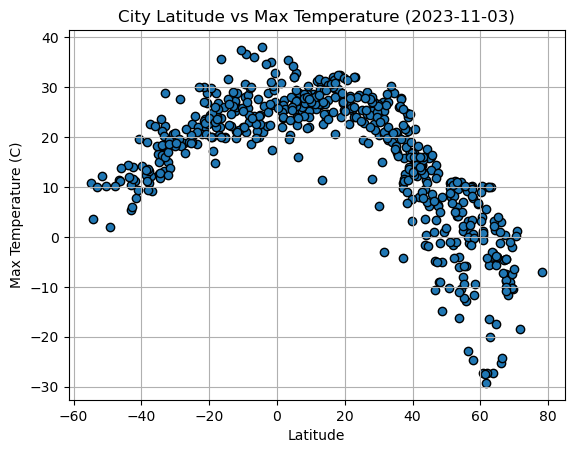

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

timestamp = city_data_df._get_value(0, "Date")
dt_object = str(datetime.fromtimestamp(timestamp))
date=dt_object[0:10]
plt.title(f'City Latitude vs Max Temperature ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

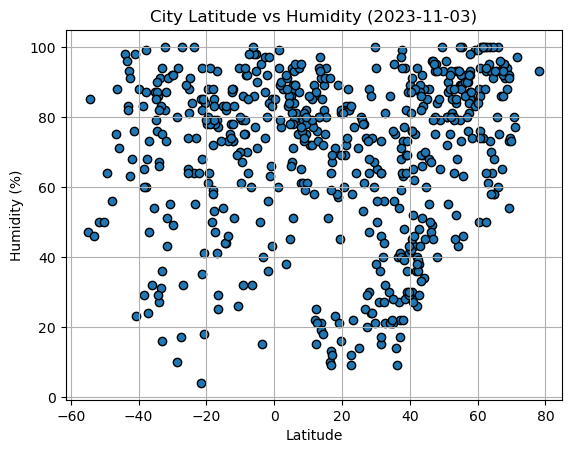

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

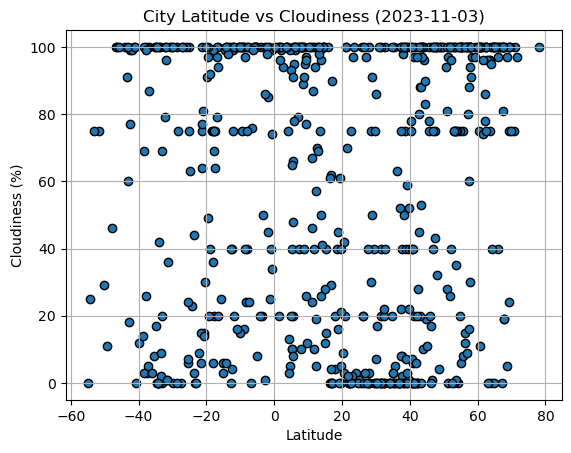

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({date})')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

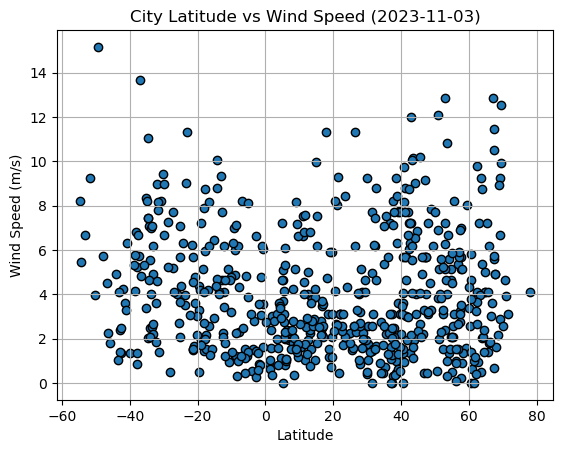

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_axis, y_axis):
    plt.scatter(x_axis, y_axis, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = (x_axis) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,26.17,82,0,3.09,US,1699037407
1,ribeira grande,38.5167,-28.7000,21.22,94,75,9.26,PT,1699037407
2,kloulklubed,7.0419,134.2556,25.28,75,79,1.93,PW,1699037408
3,petropavlovsk-kamchatsky,53.0452,158.6483,4.14,64,75,6.26,RU,1699037408
4,kodiak,57.7900,-152.4072,7.73,87,100,5.14,US,1699037408


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,puerto ayora,-0.7393,-90.3518,29.98,85,99,3.58,EC,1699037315
8,koungou,-12.7336,45.2042,27.84,78,0,4.63,YT,1699037409
10,antsiranana,-12.2787,49.2917,25.23,88,100,3.42,MG,1699037410
12,grytviken,-54.2811,-36.5092,3.55,85,25,5.47,GS,1699037410
13,adamstown,-25.0660,-130.1015,22.70,81,100,7.08,PN,1699037410


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7070308593572708


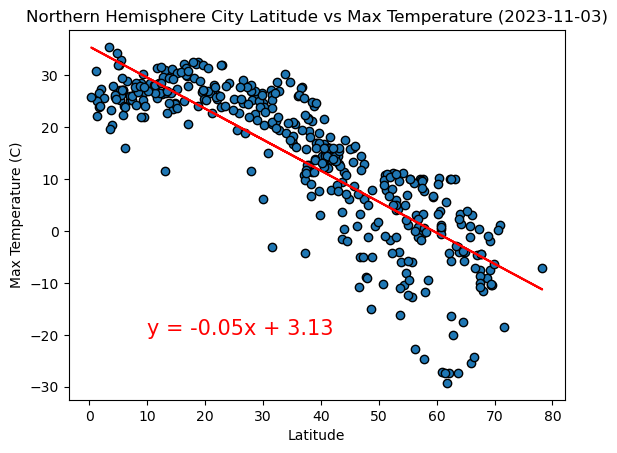

In [29]:
# Linear regression on Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Max Temp']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(10, -20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Northern Hemisphere City Latitude vs Max Temperature ({date})')

plt.show()

The r-squared is: 0.6128471557983577


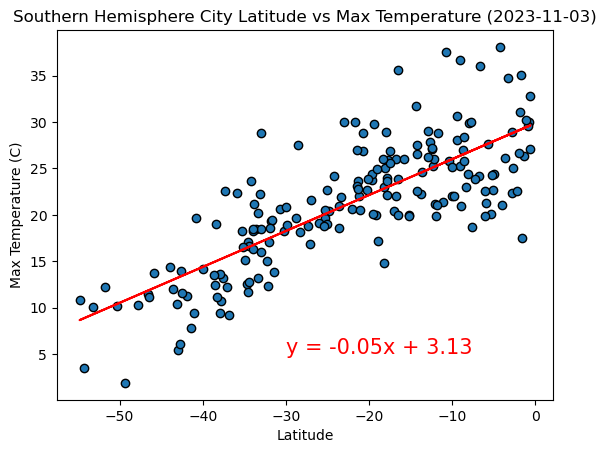

In [32]:
# Linear regression on Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Max Temp']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(-30, 5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Southern Hemisphere City Latitude vs Max Temperature ({date})')

plt.show()

**Discussion about the linear relationship:

As both R^2 values are between 0.5-0.9, there is a moderate to strong correlation between maximum temperature and latitude for northern and southern hemisphere cities. This trend makes sense as temperatures are higher towards the equater (lower latitudes) and lower towards the poles (higher latitudes).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.030516728315015965


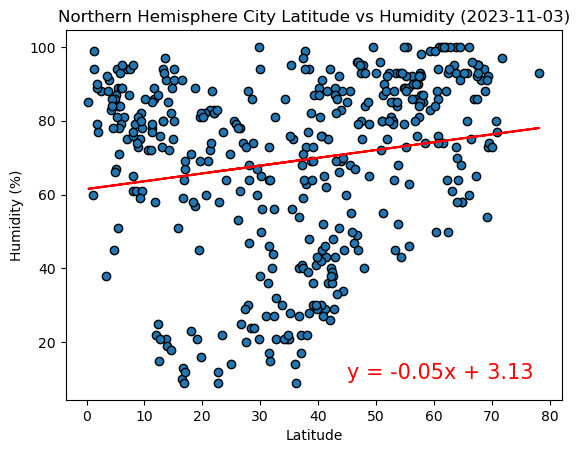

In [33]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Humidity']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs Humidity ({date})')

plt.show()

The r-squared is: 0.006145560037243108


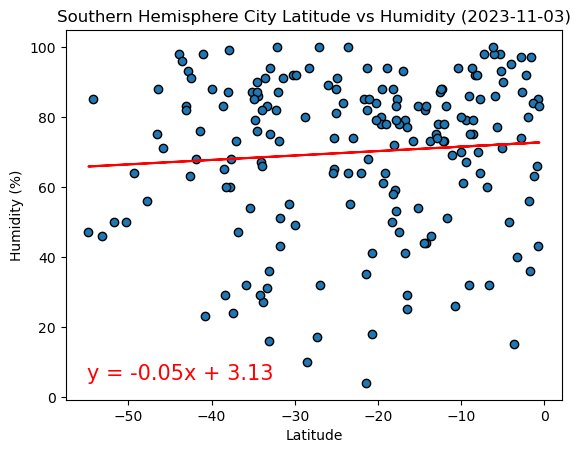

In [38]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Humidity']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(-55, 5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs Humidity ({date})')

plt.show()

**Discussion about the linear relationship:** 

As both R^2 values are less than 0.3, there is a very weak or no correlation between latitude and humidty in either the northern or southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.020382667389485135


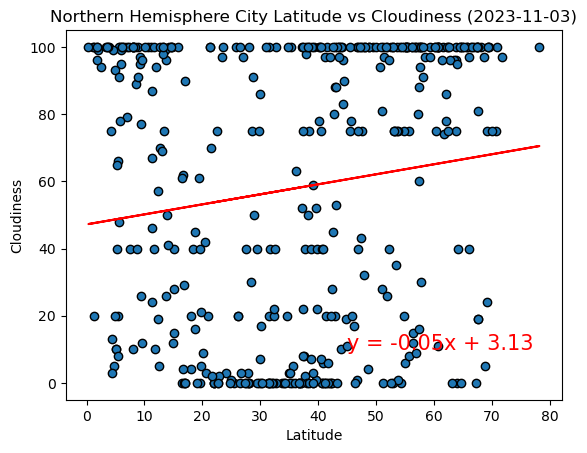

In [39]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Cloudiness']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude vs Cloudiness ({date})')

plt.show()

The r-squared is: 0.024016083696474906


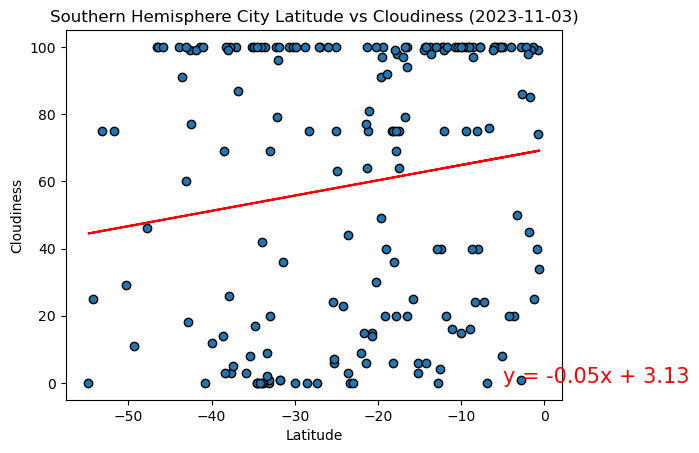

In [40]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Cloudiness']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(-5, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude vs Cloudiness ({date})')

plt.show()

**Discussion about the linear relationship: 

As both R^2 values are less than 0.3, there is a very weak or no correlation between latitude and cloudiness in either the northern or southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03727459802753975


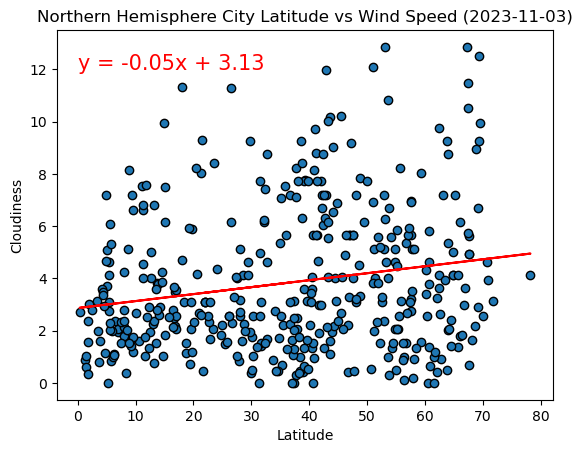

In [41]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Wind Speed']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(0, 12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude vs Wind Speed ({date})')

plt.show()

The r-squared is: 0.07380286622267956


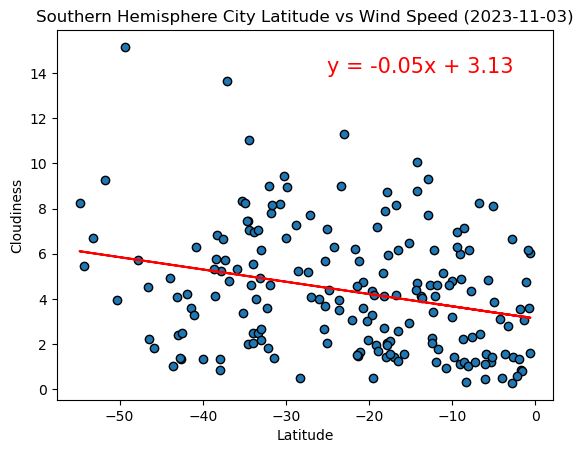

In [42]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Wind Speed']

lin_reg_plot(x_axis, y_axis)

plt.annotate(line_eq,(-25, 14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude vs Wind Speed ({date})')

plt.show()

**Discussion about the linear relationship: 

As both R^2 values are less than 0.3, there is a very weak or no correlation between latitude and cloudiness in either the northern or southern hemispheres.